In [1]:
import plotnine as p9
import pandas as pd

res = pd.read_csv('assets/outputs/results_by_series.csv', index_col='unique_id')


In [2]:
base_theme = p9.theme_538(base_family='Palatino', base_size=12) + \
             p9.theme(plot_margin=.025,
                      panel_background=p9.element_rect(fill='white'),
                      plot_background=p9.element_rect(fill='white'),
                      legend_box_background=p9.element_rect(fill='white'),
                      strip_background=p9.element_rect(fill='white'),
                      legend_background=p9.element_rect(fill='white'),
                      axis_text_x=p9.element_text(size=9, angle=0),
                      axis_text_y=p9.element_text(size=9),
                      legend_title=p9.element_blank())

## Error across all time series (locations)

In [12]:

df = res.melt()

df.columns = ['Model', 'Error']
df_summary = df.groupby('Model').mean().reset_index().sort_values('Error',ascending=False)
df_summary['Model'] = pd.Categorical(df_summary['Model'].values.tolist(),
                             categories=df_summary['Model'].values.tolist())


In [13]:
plot = \
    p9.ggplot(data=df_summary,
              mapping=p9.aes(x='Model',
                             y='Error')) + \
    p9.geom_bar(position='dodge',
                stat='identity',
                width=0.9,
                fill='darkgreen') + \
    base_theme + \
    p9.theme(axis_title_y=p9.element_text(size=7),
             axis_text_x=p9.element_text(size=9)) + \
    p9.labs(x='', y='SMAPE') + \
    p9.coord_flip() 

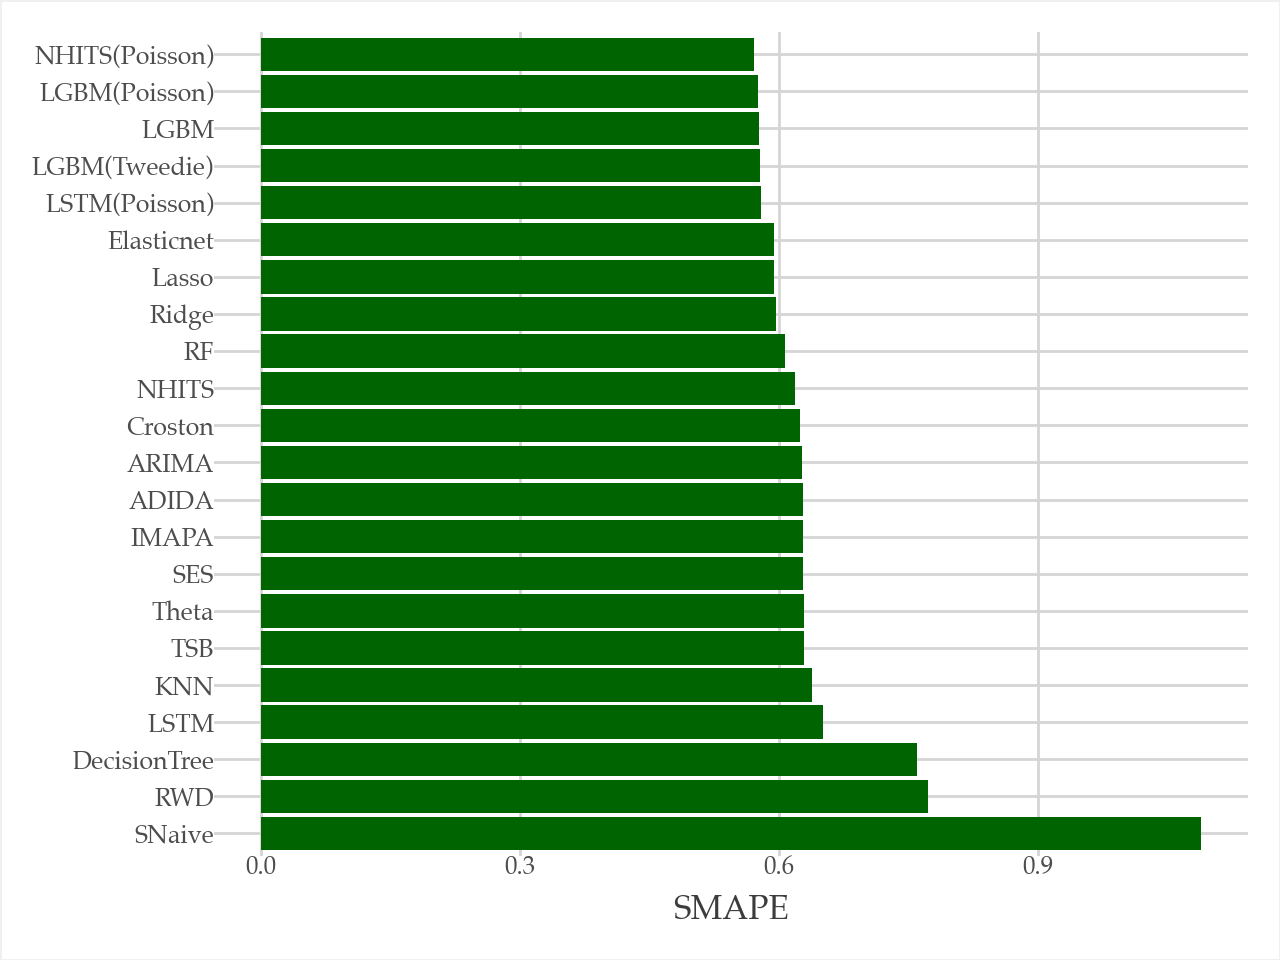

In [14]:
plot

## Error distribution across locations

In [25]:
ord = df_summary['Model']
ord.values.tolist()

df['Model'] = pd.Categorical(df['Model'].values.tolist(), categories=ord.values.tolist())

In [30]:
plot2 = p9.ggplot(df,
                 p9.aes(x='Model',
                        y='Error')) + \
       base_theme + \
       p9.geom_boxplot(
           width=0.7,
           show_legend=False) + \
       p9.coord_flip() + \
       p9.labs(x='Error distribution', y='SMAPE') + \
       p9.guides(fill=None)

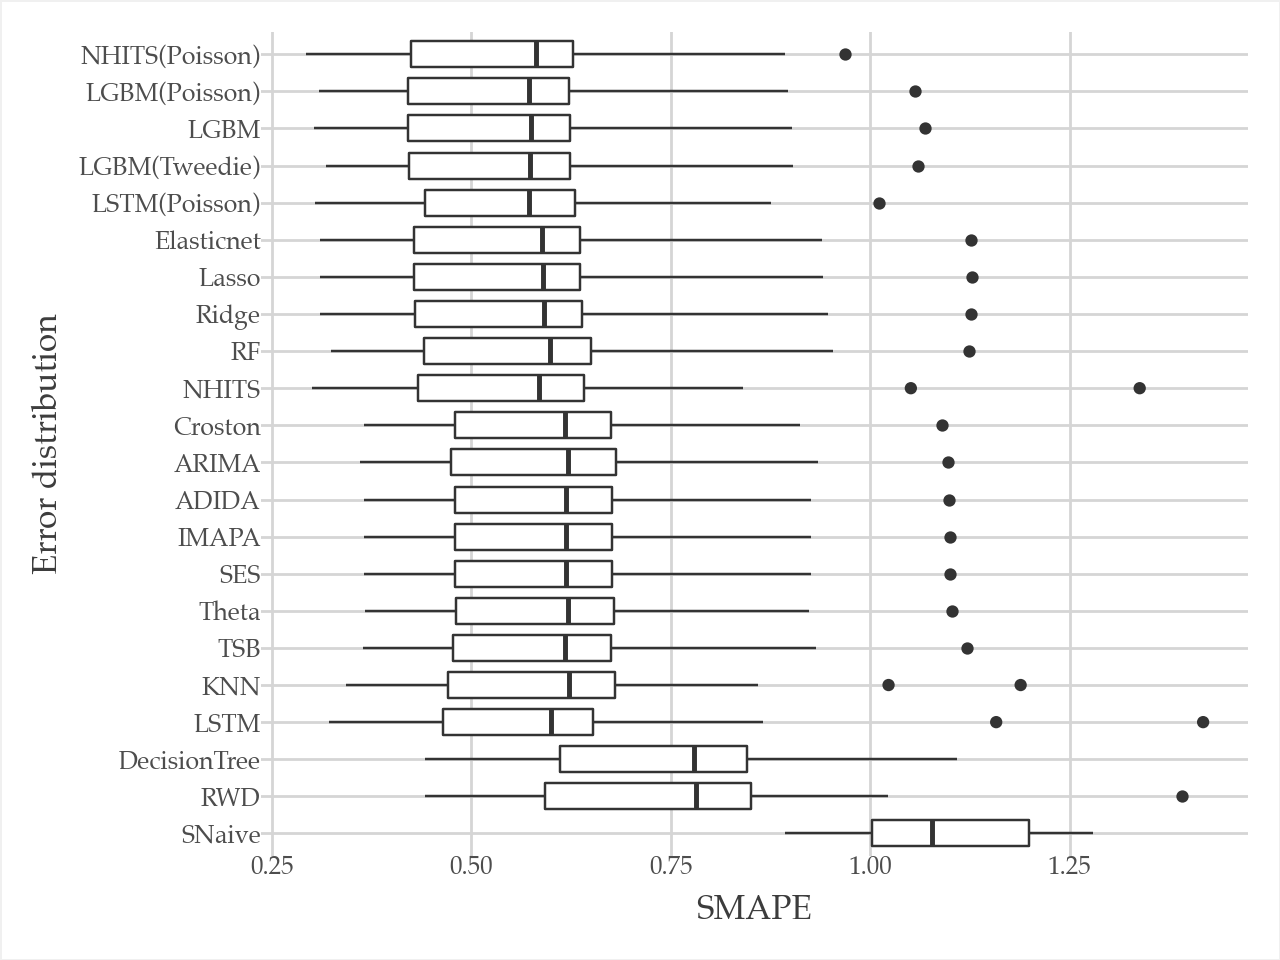

In [31]:
plot2

## Error by horizon

In [36]:

res_h = pd.read_csv('assets/outputs/results_by_horizon.csv', index_col='horizon')

df = res_h.reset_index().melt('horizon')

plot3 = \
    p9.ggplot(df) + \
    p9.aes(x='horizon',
           y='value',
           group='variable',
           color='variable') + \
    p9.geom_line(size=1) + \
    base_theme + p9.guides(color=False)

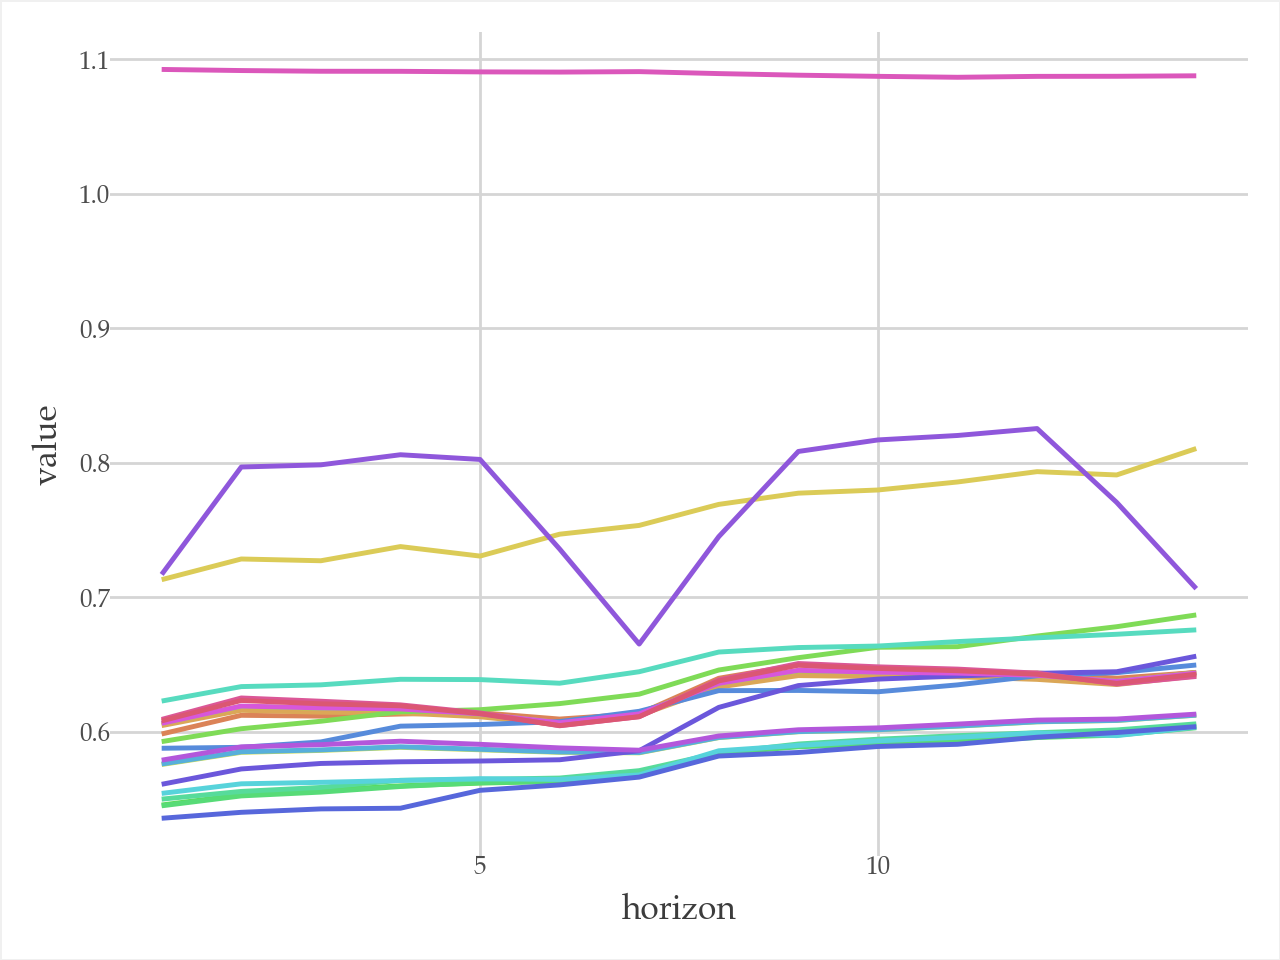

In [37]:
plot3